<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
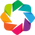

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import geoviews as gv
import geoviews.feature as gf
from geoviews import dim
from geoviews import opts
gv.extension('bokeh', 'matplotlib')

import holoviews as hv
import hvplot.pandas

import panel as pn
pn.extension()

from vega_datasets import data as vds

import cartopy
import cartopy.feature as cf
from cartopy import crs as ccrs

import geocoder

import json
import re
import json
import glob
import datetime
#import plotly.express as px
#import plotly.graph_objs as go

In [2]:
# Gerando os URL dos .csv
caminho = r'dados/dados-sp-'
todos_dados_csv = glob.glob(caminho + "*.csv")

# Colunas que incluem datas
datas = ['dataNotificacao', 'dataInicioSintomas', 'dataTeste', 'dataEncerramento']

# Colunas a serem lidas
cols = ["dataNotificacao", "dataInicioSintomas", "sintomas", "profissionalSaude", "cbo","condicoes",
        "dataTeste", "tipoTeste", "resultadoTeste", "sexo", "municipio", "municipioIBGE", "estadoNotificacao",
        "estadoNotificacaoIBGE", "idade", "dataEncerramento", "evolucaoCaso", "classificacaoFinal"]

# Carregando os dados
dados = pd.concat((pd.read_csv(f, sep=';', encoding='latin1', parse_dates=datas, usecols=cols, infer_datetime_format = False) for f in todos_dados_csv), ignore_index = True)


In [4]:
# Exclui as linhas cujas colunas indicadas abaixo sao null
dados.dropna(subset = ["dataNotificacao", "sexo", "municipio", "municipioIBGE", "estadoNotificacao", "estadoNotificacaoIBGE"], inplace = True)

# Exclui os dados Cancelados
dados.drop(dados[dados['evolucaoCaso'] == 'Cancelado'].index, inplace = True)

# Exclui os dados que possuem datas fora do escopo esperado
data_limite_inferior = np.datetime64('2020-01-01', 'ns') # Comeco da pandemia
data_limite_superior = np.datetime64('2021-03-25', 'ns') # A publicacao dos dados mais recentes ocorreram nesse dia
for data in datas:
    dados[data] = pd.to_datetime(dados[data], utc=True).dt.tz_localize(None) # Retira o fuso horario
    dados.drop(dados[(dados[data] < data_limite_inferior) | (dados[data] > data_limite_superior)].index, inplace = True) # Exclui

dados[dados['idade'] > 116] = float("NaN") # Exclui idades invalidas
dados.reset_index(drop=True, inplace = True) # Realoca os indices depois das exclusoes


In [5]:
# Checando os dados
dados.info()
print(dados.head())
print(dados['dataNotificacao'].describe(datetime_is_numeric=True))
print(dados['evolucaoCaso'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7548321 entries, 0 to 7548320
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   dataNotificacao        datetime64[ns]
 1   dataInicioSintomas     datetime64[ns]
 2   sintomas               object        
 3   profissionalSaude      object        
 4   cbo                    object        
 5   condicoes              object        
 6   dataTeste              datetime64[ns]
 7   tipoTeste              object        
 8   resultadoTeste         object        
 9   sexo                   object        
 10  municipio              object        
 11  municipioIBGE          float64       
 12  estadoNotificacao      object        
 13  estadoNotificacaoIBGE  float64       
 14  idade                  float64       
 15  dataEncerramento       datetime64[ns]
 16  evolucaoCaso           object        
 17  classificacaoFinal     object        
dtypes: datetime64[ns](4), 

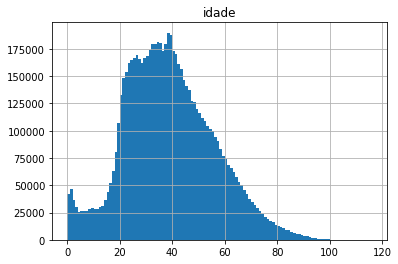

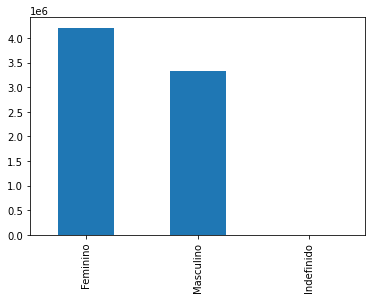

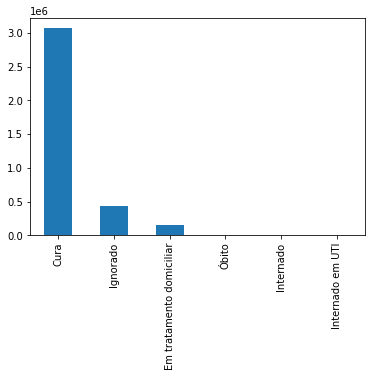

In [6]:
dados.hist(column='idade', bins=116)
plt.show()

dados['sexo'].value_counts().plot(kind='bar')
plt.show()

dados['evolucaoCaso'].value_counts().plot(kind='bar')
plt.show()



In [9]:
cidades = {}
for i in range(len(dados)):
    cidadeIBGE = dados['municipioIBGE'][i]
    if cidadeIBGE != cidadeIBGE: # Precisa disso pra pular os dados cujo campo municipioIBGE é NULL (float vira NaN)
        continue
    cidadeIBGE = int(cidadeIBGE)
    resultadoTeste = dados['resultadoTeste'][i]
    if cidadeIBGE not in cidades:
        cidades[cidadeIBGE] = {}
        cidades[cidadeIBGE]['Nome'] = dados['municipio'][i]
        cidades[cidadeIBGE]['Positivo'] = 0
        cidades[cidadeIBGE]['Negativo'] = 0
        cidades[cidadeIBGE]['Inconclusivo ou Indeterminado'] = 0

    # Precisa disso por causa dos NaN
    if resultadoTeste not in cidades[cidadeIBGE]:
        cidades[cidadeIBGE][resultadoTeste] = 0
    cidades[cidadeIBGE][resultadoTeste] += 1

print("Numero de cidades = ", len(cidades.keys()))


Numero de cidades =  645


In [10]:
sort_cidades = sorted(cidades.items(), key=lambda x: x[1]['Positivo'], reverse=True)

for i in sort_cidades[:20]:
	print(i[1])

{'Nome': 'São Paulo', 'Positivo': 380784, 'Negativo': 733845, 'Inconclusivo ou Indeterminado': 4534, nan: 897829}
{'Nome': 'São José dos Campos', 'Positivo': 44673, 'Negativo': 111298, 'Inconclusivo ou Indeterminado': 130, nan: 16313}
{'Nome': 'São José do Rio Preto', 'Positivo': 42117, 'Negativo': 127551, 'Inconclusivo ou Indeterminado': 84, nan: 14144}
{'Nome': 'Campinas', 'Positivo': 40735, 'Negativo': 105853, 'Inconclusivo ou Indeterminado': 176, nan: 75872}
{'Nome': 'São Bernardo do Campo', 'Positivo': 36047, 'Negativo': 112620, 'Inconclusivo ou Indeterminado': 265, nan: 50368}
{'Nome': 'Ribeirão Preto', 'Positivo': 31473, 'Negativo': 63948, 'Inconclusivo ou Indeterminado': 51, nan: 6036}
{'Nome': 'Santo André', 'Positivo': 28227, 'Negativo': 81443, 'Inconclusivo ou Indeterminado': 36, nan: 3766}
{'Nome': 'Sorocaba', 'Positivo': 23524, 'Negativo': 66103, 'Inconclusivo ou Indeterminado': 36, nan: 17328}
{'Nome': 'Piracicaba', 'Positivo': 22423, 'Negativo': 66447, 'Inconclusivo ou I

In [11]:
#pega a população por municípios
populacaoPorMunicipio = pd.read_csv('dados/populacaoPorMunicipio.csv', sep=",", encoding='utf-8',
                   dtype={"id": str, "PermiltagemInfeccao": np.float64})

In [12]:
#criando formas dos municípios
shapefile = 'shapefile/municipiosSp-polygon.shp'
shapes = cartopy.io.shapereader.Reader(shapefile)

In [13]:
#adicionando os ids das cidades nos dataframe
munCode=[]
for municipio in list(shapes.records()):
    munCode.append(municipio.attributes['id'])
populacaoPorMunicipio['id'] = munCode

# Calcula a permiltagem de infeccoes para cada cidade
for i in range(len(populacaoPorMunicipio)):
    cidadeID = float(populacaoPorMunicipio['id'][i])
    cidadePop = populacaoPorMunicipio['Pop'][i]
    if cidadeID in cidades:
        populacaoPorMunicipio.loc[i, 'PermiltagemInfeccao'] = 1000 * cidades[cidadeID]['Positivo'] / cidadePop
    else:
        populacaoPorMunicipio.loc[i, 'PermiltagemInfeccao'] = 0

In [14]:
#colocando o dataframe no formato necessário para plotar
county_population = hv.Dataset(populacaoPorMunicipio)
county_population.data.head()

,Local,Pop,id,PermiltagemInfeccao
0,Adamantina,33797,3500105,39.234252
1,Adolfo,3557,3500204,66.066910
2,Aguaí,32148,3500303,33.967898
3,Águas da Prata,7584,3500402,36.392405
4,Águas de Lindóia,17266,3500501,29.537820


In [15]:
#nem sei que porra é essa (pelo visto eh pra setar a barra e o tipo dela kkkkk)
from bokeh.models import PrintfTickFormatter
formatter = PrintfTickFormatter(format='%f')

In [16]:
# também não sei que porra é essa
hv.output(backend='bokeh')


# montando o mapa
# on arg: a mapping between the attribute names in the records and the dimensions in the dataset
# value arg: the value dimension in the dataset the values will be drawn from
choropleth = gv.Shape.from_records(records=shapes.records(), 
                                   dataset=county_population, 
                                   on='id', 
                                   value='PermiltagemInfeccao', 
                                   index=['Local']).opts(tools=['hover'], 
                                                          width=900, 
                                                          height=600, 
                                                          cmap='RdBu_r',
                                                          color_index='PermiltagemInfeccao',
                                                          colorbar=True, 
                                                          toolbar='left',
                                                          cformatter=formatter) 



#plotando o mapa
pn.Row(choropleth)

Row
    [0] HoloViews(Polygons)

In [17]:
# Top 5 cidades com maiores taixas de infeccao que tem populacao maior que 50000
populacaoPorMunicipio[populacaoPorMunicipio['Pop'] > 50000].sort_values(by=['PermiltagemInfeccao'], ascending=False).head()



,Local,Pop,id,PermiltagemInfeccao
556,São José do Rio Preto,408258,3549805,103.162706
120,Caraguatatuba,100840,3510500,94.168981
382,Olímpia,50024,3533908,89.337118
410,Paulínia,82146,3536505,83.972439
340,Mirassol,53792,3530300,82.893367
